<a href="https://colab.research.google.com/github/BrianKipngeno/Petrol-consumption-prediction-with-PyTorch/blob/main/Petrol_consumption_prediction_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a license.

We will then use our trained model to predict the gas consumption for the following observation (8.5, 4550, 1980, 0.75 )

Dataset URL: http://bit.ly/PetroleumDataset

### Step 1: Data preparation

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Let's load our dataset
df4 = pd.read_csv('http://bit.ly/PetroleumDataset')

df4.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
# Checking the columns to identify our target column
df4.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

### Step 2: Building the model


In [ ]:
# Let's divides the dataset into features and labels sets
X = df4.drop(["Petrol_Consumption"], axis = 1).values

y = df4.filter(["Petrol_Consumption"], axis = 1).values

In [ ]:
# Let's split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# We then convert the dataset features and labels to torch tensors.
X_train = torch.tensor(X_train).float()

X_test = torch.tensor(X_test).float()

y_train = torch.tensor(y_train).float()

y_test = torch.tensor(y_test).float()

In [ ]:
# Let's build our model
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):

        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = Net()

### Steps 3 - 5: Training the model

In [ ]:
# Training the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000

loss_vals = []

for epoch in range(num_epochs):

   # Clear out the gradients from the last step loss.backward()
    optimizer.zero_grad()

   # Step 3: Forward prpagation
    outputs = model(X_train)

   # Step 4: Loss computation
    loss = criterion(outputs, y_train)

   # Step 5: Backward propagation to calculate gradients
    loss.backward()

    loss_vals.append(loss.detach().numpy().item())

   # Updating the weights
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 17323.3730
Epoch [200/1000], Loss: 16248.4707
Epoch [300/1000], Loss: 15838.6104
Epoch [400/1000], Loss: 15513.2451
Epoch [500/1000], Loss: 15255.2891
Epoch [600/1000], Loss: 14964.3154
Epoch [700/1000], Loss: 14661.3818
Epoch [800/1000], Loss: 14458.3223
Epoch [900/1000], Loss: 14166.9375
Epoch [1000/1000], Loss: 13817.9092


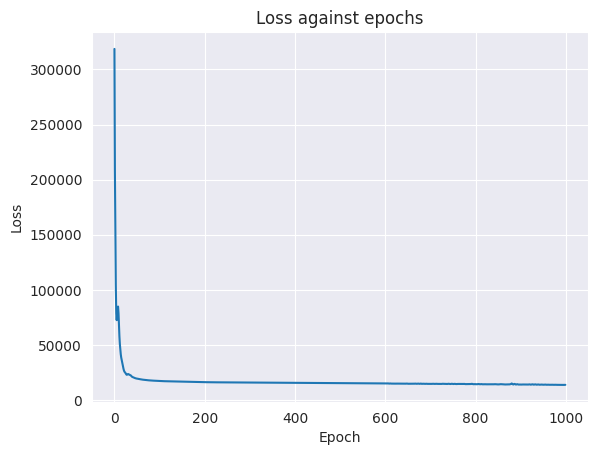

In [ ]:
# Let's plot our loss
import seaborn as sns

sns.set_style('darkgrid')

indexes = list(range(len(loss_vals)))

sns.lineplot(x = indexes, y = loss_vals)

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.title('Loss against epochs')

plt.show()

In [ ]:
# Let's make our prediction
model.requires_grad_(False)

outputs = model(X_test)

mae = mean_absolute_error(y_test, outputs)

mse = mean_squared_error(y_test, outputs)

print(f'Mean absolute error: {mae:.2f}')

print(f'Mean squared error: {mse:.2f}')

Mean absolute error: 124.16
Mean squared error: 17472.64


In [ ]:
# Let's compare these values
predictions = [item for sublist in outputs.tolist() for item in sublist]

y_test = [item for sublist in y_test.tolist() for item in sublist]

results = pd.DataFrame({'Actual Consumption': y_test, 'Predicted Consumption': predictions})

results.head(10)

,Actual Consumption,Predicted Consumption
0,534.0,603.200134
1,410.0,477.251282
2,577.0,447.303040
3,571.0,460.937683
4,577.0,383.110229
5,704.0,501.875427
6,487.0,584.337646
7,587.0,743.031372
8,467.0,595.955322
9,580.0,667.077515


### Step 6: Making inference on unseen data

In [ ]:
# The model.eval() method is used to set a model in evaluation mode. it disables certain operations  active during training but are not desired during evaluation or inference.
model.eval()

# New observations
new_data = [8.5, 4550, 1980, 0.75]

# Convert data to PyTorch tensor
new_data_tensor = torch.tensor(new_data, dtype=torch.float32).view(1, -1)  # Reshape to (1, input_size)

# Perform inference
with torch.no_grad():
    prediction = model(new_data_tensor)

# Print or use the prediction for further analysis
print("Predicted petrol consumption:", prediction.item())

Predicted petrol consumption: 527.6982421875
